# Round 2

    Import libraries

In [1]:
import pandas as pd
import numpy as np

Import data and present shape

In [2]:
data = pd.read_csv('marketing_customer_analysis.csv')
data.shape

(10910, 26)

Standardizing header names

In [3]:

data.columns = list(map(lambda el: el.lower().replace(' ','_'), data.columns))

# Droping the index column
data = data.drop(['unnamed:_0'], axis=1)

Showing numerical and categorical rows

In [4]:
print('Numerical Columns \n', list(data.select_dtypes(np.number).columns), '\n')

print('Categorical Columns: \n', list(data.select_dtypes(['object']).columns))

Numerical Columns 
 ['customer_lifetime_value', 'income', 'monthly_premium_auto', 'months_since_last_claim', 'months_since_policy_inception', 'number_of_open_complaints', 'number_of_policies', 'total_claim_amount'] 

Categorical Columns: 
 ['customer', 'state', 'response', 'coverage', 'education', 'effective_to_date', 'employmentstatus', 'gender', 'location_code', 'marital_status', 'policy_type', 'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size', 'vehicle_type']


Check and deal with NaN values.

In [5]:
data.isna().sum()

customer                            0
state                             631
customer_lifetime_value             0
response                          631
coverage                            0
education                           0
effective_to_date                   0
employmentstatus                    0
gender                              0
income                              0
location_code                       0
marital_status                      0
monthly_premium_auto                0
months_since_last_claim           633
months_since_policy_inception       0
number_of_open_complaints         633
number_of_policies                  0
policy_type                         0
policy                              0
renew_offer_type                    0
sales_channel                       0
total_claim_amount                  0
vehicle_class                     622
vehicle_size                      622
vehicle_type                     5482
dtype: int64

Upon analysis we can see that we have a lot of null values that have almost the same frequency in some fields, they are probably duplicates so we are goint to check for duplicates. After that we recheck the nan values count.

In [6]:
data = data.drop_duplicates()
display(data.isna().sum())
data

customer                            0
state                             614
customer_lifetime_value             0
response                          614
coverage                            0
education                           0
effective_to_date                   0
employmentstatus                    0
gender                              0
income                              0
location_code                       0
marital_status                      0
monthly_premium_auto                0
months_since_last_claim           623
months_since_policy_inception       0
number_of_open_complaints         623
number_of_policies                  0
policy_type                         0
policy                              0
renew_offer_type                    0
sales_channel                       0
total_claim_amount                  0
vehicle_class                     608
vehicle_size                      608
vehicle_type                     5465
dtype: int64

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


Some rows have ghanged, but some columns still have many Nan's, I think that months_since_last_claim and number_of_open_complaints can be assigned with 0 value, because if they are non existent the most probable cause is that they didn't have a claim or complaint at all.
Likewise the field response I think by nature of a boolean and given the name of column should be by default No.

In [7]:
# Since this isn't a true boolean, but an object that acts like one I checked if it had some non conform values
data['response'].value_counts()

No     8795
Yes    1464
Name: response, dtype: int64

In [8]:
# Filling all the NaN's for response with the default No
data['response'] = data['response'].fillna('No')

In [9]:
# Filling all the NaN's for months_since_last_claim with 0
data['months_since_last_claim'] = data['months_since_last_claim'].fillna(0)

In [10]:
# Filling all the NaN's for number_of_open_complaints with 0
data['number_of_open_complaints'] = data['number_of_open_complaints'].fillna(0)

In [11]:
data['vehicle_class'].value_counts()

Four-Door Car    5200
Two-Door Car     2112
SUV              2009
Sports Car        548
Luxury SUV        208
Luxury Car        188
Name: vehicle_class, dtype: int64

In [12]:
data['vehicle_size'].value_counts()

Medsize    7233
Small      1962
Large      1070
Name: vehicle_size, dtype: int64

In [13]:
data['vehicle_type'].value_counts()

A    5408
Name: vehicle_type, dtype: int64

After checking, I decided to drop the column 'vehicle_type' because it has a lot of NaN's and only one possible value, so it is useless for analysis., also going to drop the mustomer because it is an unique identifier and we don't need it at all.
In the future i'll try a version of this Lab not droping 'vehicle_type' and replacing the Nan's with M, because as I have discussed with Erin, the A could refer to automatic and having a Nan could mean it's a Manual.

Regarding vehicle_size I'll put assign all Nan's to Medsize, because it is by far the most common vehicle size.
In the vehicle_class column I'll fill the Nan's again with the most common value, just because it is again the most common by a really big margin, and join Sports Car, Luxury SUV and Luxury Car under Luxury Car because they aren't that representative and could have a better meaning when grouped.

In [14]:
# Droping column customer and vehicle_type
data = data.drop(['customer', 'vehicle_type'], axis=1)
# Alternative
# data = data.drop(columns = ['customer', 'vehicle_type'])

In [15]:
# Filling all the NaN's for vehicle_size with Medsize
data['vehicle_size'] = data['vehicle_size'].fillna('Medsize')

In [16]:
# Filling all the NaN's for vehicle_class with Four-Door Car
data['vehicle_class'] = data['vehicle_class'].fillna('Four-Door Car')

# Replacing the old values of Sports car and Luxury SUV with Luxury Car
data['vehicle_class'] = data['vehicle_class'].replace(['Sports Car','Luxury SUV'],'Luxury Car')

Only one column to analyse, the column state witch still has 614 Nan's, lets checkout the calues and see if we can act.

In [17]:
data['state'].value_counts()

California    3548
Oregon        2897
Arizona       1934
Nevada         992
Washington     888
Name: state, dtype: int64

Since there are so many rows with Nan, and I can't see a very dominant value I don't think atributing them all to California is right. Maybe an equal distribuiton wouldn't mess the data but at least for now i can't see a way of implementing that outside of using counters and an exaustive loop to distribute the assigned values. For that reason and just not to leave them as Nan's I'm going to replace them with Other State, since droping all the rows seems too much.

In [18]:
data['state'] = data['state'].fillna('Other State')

Extracting the month and creating a new column, then filter to show only the first quarter. The field that we have to convert to a data is the only one that in the data has a date format, 'efective_to_date', but it is currently with the object type, we have to convert it do datetime type.

In [19]:
# converting the type from object to datetime
data['effective_to_date'] = pd.to_datetime(data['effective_to_date'], errors='coerce')
#data['month'] = pd.DatetimeIndex(data['effective_to_date']).month

# Alternative method
data['month'] = data['effective_to_date'].dt.month

In [20]:
# Again Dropping the possible duplicates and reseting the index
data = data.drop_duplicates()
data = data.reset_index(drop=True)

# filtering the month January to March
data[(data['month'].isin([1,2,3]))]

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,month
0,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,Suburban,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,2
1,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,Suburban,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,1
2,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,Suburban,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,2
3,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,Suburban,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,1
4,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,Suburban,...,0.0,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10479,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,0,Suburban,...,0.0,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,1
10480,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,Urban,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,1
10481,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837,Rural,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury Car,Medsize,2
10482,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,64195,Urban,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,2


# Bonus task

I'm not going through the descriptive process as it is discribed in detail above, but I'm going to pack it into a function as instructed.

In [21]:
#funtion to fill Nan's into X with Y value, default value is 0
def null_replace(x, y=0):
    return x.fillna(y)

#funtion to transform X datatype to datetime
def force_date(x):
    return pd.to_datetime(x, errors='coerce')

#funtion standardize column names to default python snake form, Y parameter can be changed to a diferent disered value
def std_data(x, y='_'):
#     x.columns = [e.lower().replace(' ','_' for e in x)]
    x.columns = list(map(lambda el: el.lower().replace(' ',y), x))
    return x.drop(['unnamed:_0'], axis=1)

#Main operations funtion
def data_crunch(dataset):

    #Standardizing dataset
    dataset = std_data(dataset)
    
    #printing numerical and categorical columns
    print('Numerical Columns \n', list(dataset.select_dtypes(np.number).columns), '\n')
    print('Categorical Columns: \n', list(dataset.select_dtypes(['object']).columns))
    
    #Trating Nan Values and droping empty rows, and not usefull rows
    dataset = dataset.drop_duplicates()
    dataset['response'] = null_replace(dataset['response'],'No')
    dataset['months_since_last_claim'] = null_replace(dataset['months_since_last_claim'])
    dataset['number_of_open_complaints'] = null_replace(dataset['number_of_open_complaints'])
    
    dataset = dataset.drop(['customer', 'vehicle_type'], axis=1)
    
    dataset['vehicle_size'] = null_replace(dataset['vehicle_size'],'Medsize')
    dataset['vehicle_class'] = null_replace(dataset['vehicle_class'],'Four-Door Car')
    dataset['state'] = null_replace(dataset['state'],'Other State')
    
    dataset['vehicle_class'] = dataset['vehicle_class'].replace(['Sports Car','Luxury SUV'],'Luxury Car')
    
    
    #Fixing the efective to date column data type and adding a column with the months
    dataset['effective_to_date'] = force_date(dataset['effective_to_date'])
    dataset['month'] = pd.DatetimeIndex(dataset['effective_to_date']).month
    
    #reseting the dataset
    dataset = dataset.reset_index(drop=True)
    
    return dataset

data = pd.read_csv('marketing_customer_analysis.csv')
data = data_crunch(data)

data[(data['month'].isin([1,2,3]))]


Numerical Columns 
 ['customer_lifetime_value', 'income', 'monthly_premium_auto', 'months_since_last_claim', 'months_since_policy_inception', 'number_of_open_complaints', 'number_of_policies', 'total_claim_amount'] 

Categorical Columns: 
 ['customer', 'state', 'response', 'coverage', 'education', 'effective_to_date', 'employmentstatus', 'gender', 'location_code', 'marital_status', 'policy_type', 'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size', 'vehicle_type']


,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,month
0,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,Suburban,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,2
1,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,Suburban,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,1
2,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,Suburban,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,2
3,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,Suburban,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,1
4,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,Suburban,...,0.0,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10868,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,0,Suburban,...,0.0,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,1
10869,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,Urban,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,1
10870,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837,Rural,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury Car,Medsize,2
10871,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,64195,Urban,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,2


# Round 3

Showing data frame info

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10873 entries, 0 to 10872
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   state                          10873 non-null  object        
 1   customer_lifetime_value        10873 non-null  float64       
 2   response                       10873 non-null  object        
 3   coverage                       10873 non-null  object        
 4   education                      10873 non-null  object        
 5   effective_to_date              10873 non-null  datetime64[ns]
 6   employmentstatus               10873 non-null  object        
 7   gender                         10873 non-null  object        
 8   income                         10873 non-null  int64         
 9   location_code                  10873 non-null  object        
 10  marital_status                 10873 non-null  object        
 11  monthly_premium

Describing the data frame, in transposed form for easier reading

In [23]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,10873.0,8016.881720,6884.829202,1898.007675,4014.453113,5768.830622,8996.774075,83325.381190
income,10873.0,37537.101444,30362.078350,0.000000,0.000000,33811.000000,62262.000000,99981.000000
monthly_premium_auto,10873.0,93.216684,34.454801,61.000000,68.000000,83.000000,109.000000,298.000000
months_since_last_claim,10873.0,14.277292,10.399697,0.000000,5.000000,13.000000,23.000000,35.000000
months_since_policy_inception,10873.0,48.098777,27.929932,0.000000,24.000000,48.000000,71.000000,99.000000
number_of_open_complaints,10873.0,0.361538,0.889177,0.000000,0.000000,0.000000,0.000000,5.000000
number_of_policies,10873.0,2.977467,2.397752,1.000000,1.000000,2.000000,4.000000,9.000000
total_claim_amount,10873.0,434.902879,292.233402,0.099007,271.014511,383.363758,547.200000,2893.239678
month,10873.0,1.466661,0.498910,1.000000,1.000000,1.000000,2.000000,2.000000


Importing the ploting libraries

In [24]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

#Setting all the figure sizes to a reasonable size
sns.set(rc = {'figure.figsize':(8,5)})

Total response plot 

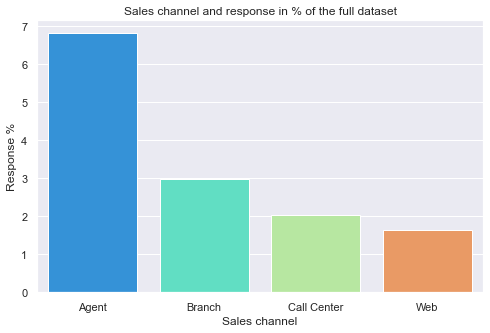

In [25]:
f_plot = data.loc[data['response'] == 'Yes', ['sales_channel', 'response']]
lines = len(data)
f_plot = f_plot.groupby(['sales_channel']).size().reset_index(name='counts')
f_plot['counts'] = f_plot['counts']/lines*100


sns.barplot(x='sales_channel', y='counts',data=f_plot, palette='rainbow')
plt.xlabel('Sales channel')
plt.ylabel('Response %')
plt.title('Sales channel and response in % of the full dataset')
plt.show()

Response rate by the sales channel.

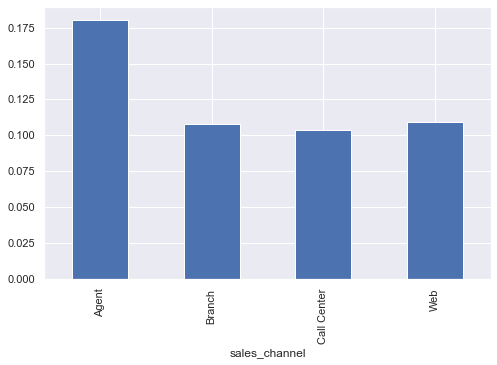

In [26]:
data['response_rate'] = np.where(data['response'] == 'Yes',1,0)
data.groupby('sales_channel')['response_rate'].mean().plot.bar()
plt.show()

Response rate by income

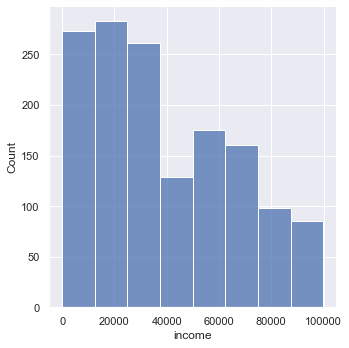

In [27]:
sns.displot(x='income',data=data[data['response_rate']==1], palette='rainbow', bins=8)
plt.show()

Response rate by total claim amount

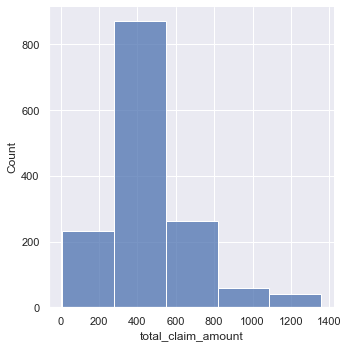

In [28]:
sns.displot(x='total_claim_amount',data=data[data['response_rate']==1], palette='rainbow', bins=5)
plt.show()

# Round 4 + 5

Complete the following task

Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals.

(You can use np.number and np.object to select the numerical data types and categorical data types respectively)
   
Now we will try to check the normality of the numerical variables visually
Use seaborn library to construct distribution plots for the numerical variables
Use Matplotlib to construct histograms
Do the distributions for different numerical variables look like a normal distribution
For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.
Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

X-y split.
Normalize (numerical).


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Check the data types of the columns

In [30]:
data.dtypes

state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                 float64
months_since_policy_inception             int64
number_of_open_complaints               float64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                            object
total_claim_amount                      

Droping previously created columns to graphs

In [31]:
data = data.drop(['response_rate'], axis=1)

Getting the numerical and categorical data into separate dataframes

In [32]:
numerical = data.select_dtypes(np.number)
categorical = data.select_dtypes('object')

numerical.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000,2
1,2228.525238,0,64,3.0,26,0.0,1,744.924331,1
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000,2
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411,1
4,9025.067525,23675,117,0.0,31,0.0,7,707.925645,1


Checking the normality of values

In [33]:
numerical.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,10873.0,8016.881720,6884.829202,1898.007675,4014.453113,5768.830622,8996.774075,83325.381190
income,10873.0,37537.101444,30362.078350,0.000000,0.000000,33811.000000,62262.000000,99981.000000
monthly_premium_auto,10873.0,93.216684,34.454801,61.000000,68.000000,83.000000,109.000000,298.000000
months_since_last_claim,10873.0,14.277292,10.399697,0.000000,5.000000,13.000000,23.000000,35.000000
months_since_policy_inception,10873.0,48.098777,27.929932,0.000000,24.000000,48.000000,71.000000,99.000000
number_of_open_complaints,10873.0,0.361538,0.889177,0.000000,0.000000,0.000000,0.000000,5.000000
number_of_policies,10873.0,2.977467,2.397752,1.000000,1.000000,2.000000,4.000000,9.000000
total_claim_amount,10873.0,434.902879,292.233402,0.099007,271.014511,383.363758,547.200000,2893.239678
month,10873.0,1.466661,0.498910,1.000000,1.000000,1.000000,2.000000,2.000000


As we can observe total_claim_amount, customer_lifetime_value have massive ranges so we have to address this later with MinMaxScaller method.

Distribution plots for the numerical variables

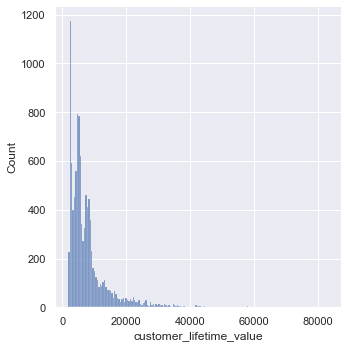

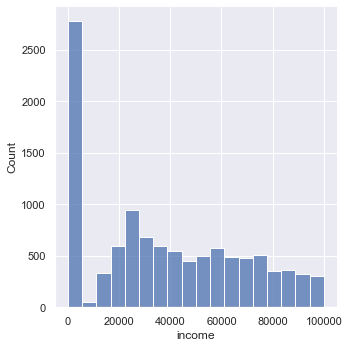

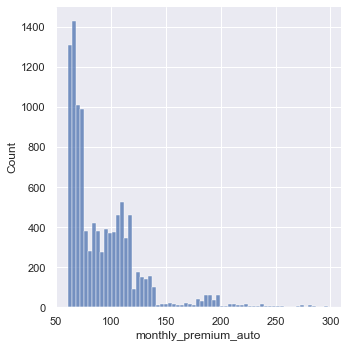

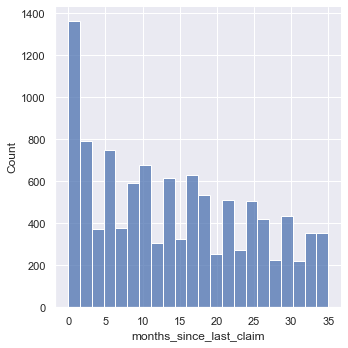

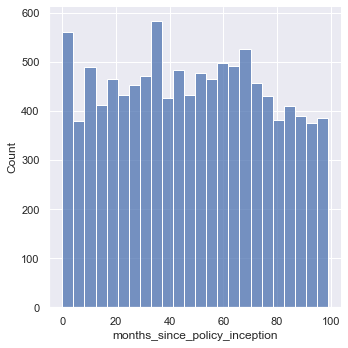

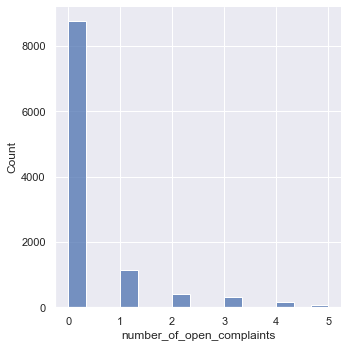

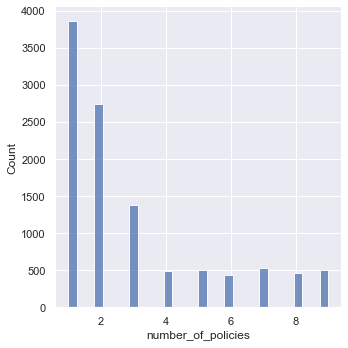

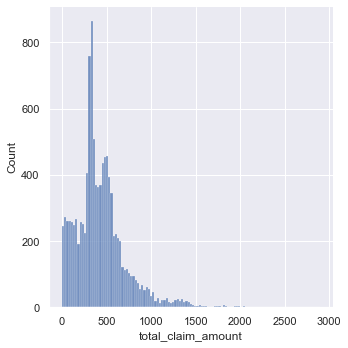

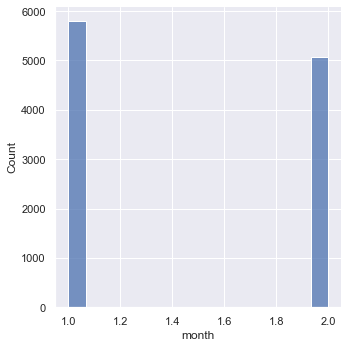

In [34]:
for i, column in enumerate(numerical.columns, 1):
    sns.displot(numerical[column])

Checking the graphs while aplying the standard trimms of values using the percentiles

Trimming simulation for the common quartile values of customer_lifetime_value


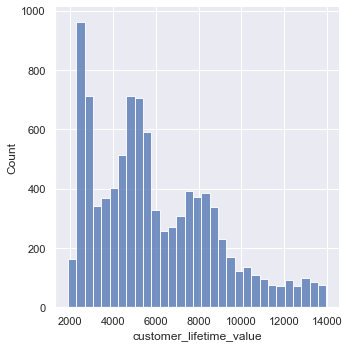

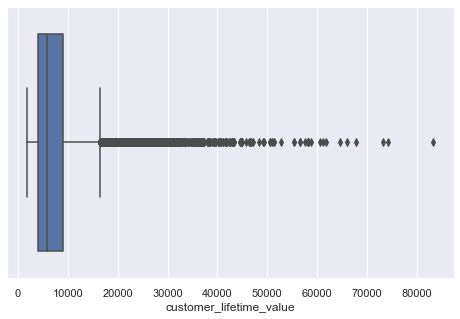

Trimming simulation for the common quartile values of income


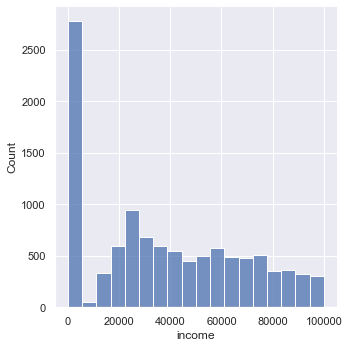

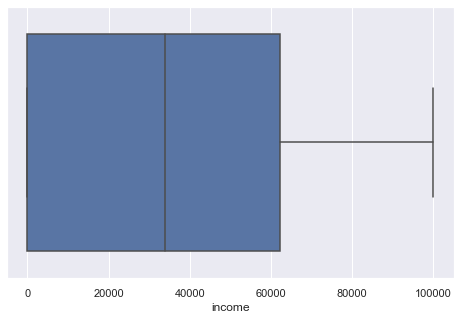

Trimming simulation for the common quartile values of monthly_premium_auto


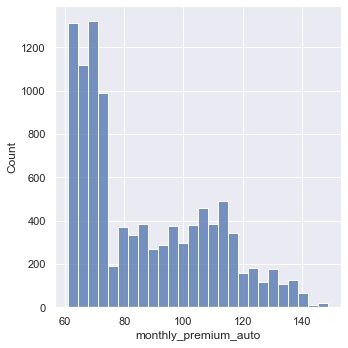

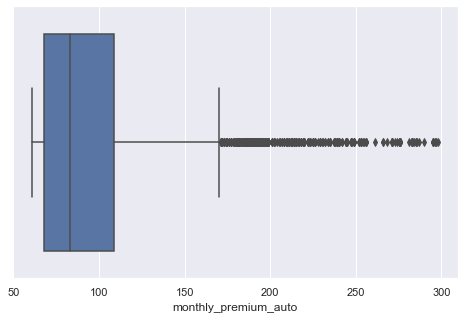

Trimming simulation for the common quartile values of months_since_last_claim


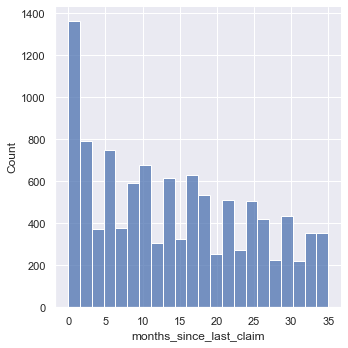

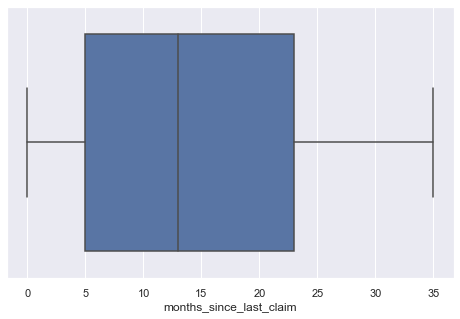

Trimming simulation for the common quartile values of months_since_policy_inception


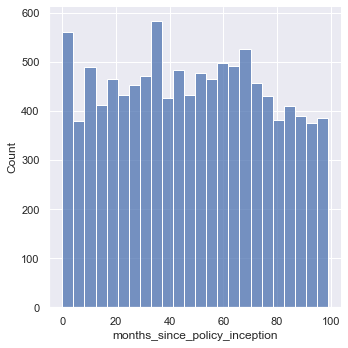

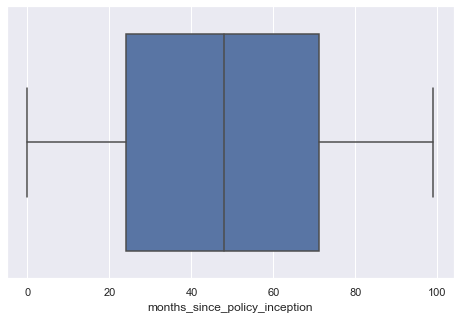

Trimming simulation for the common quartile values of number_of_open_complaints


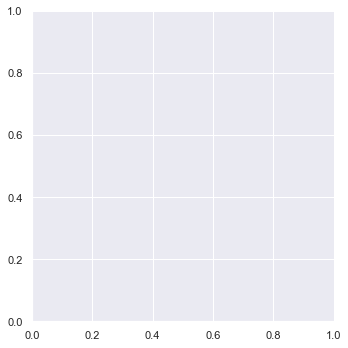

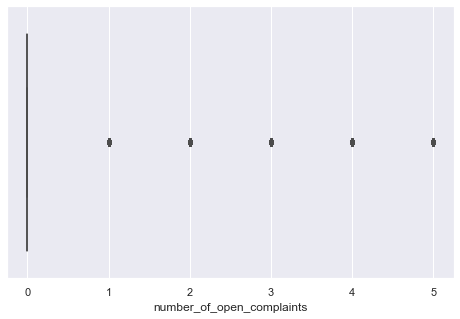

Trimming simulation for the common quartile values of number_of_policies


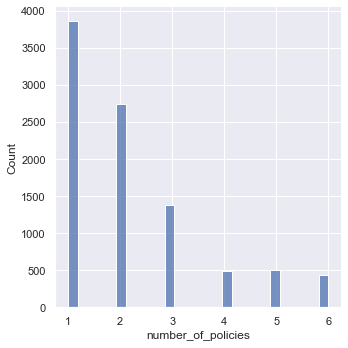

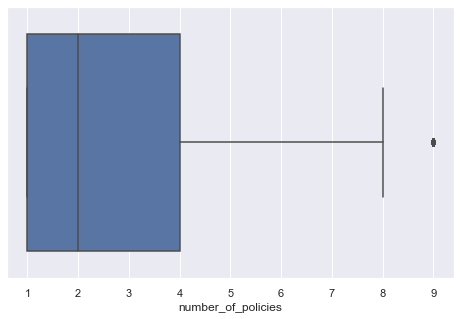

Trimming simulation for the common quartile values of total_claim_amount


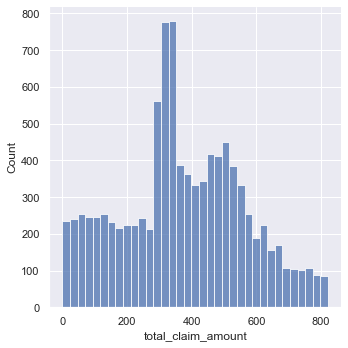

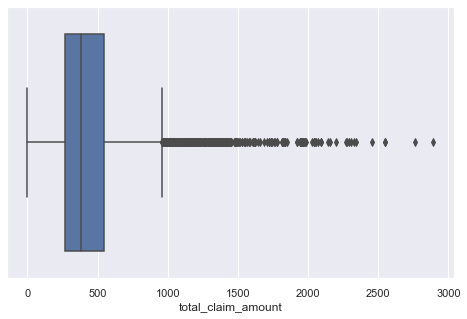

Trimming simulation for the common quartile values of month


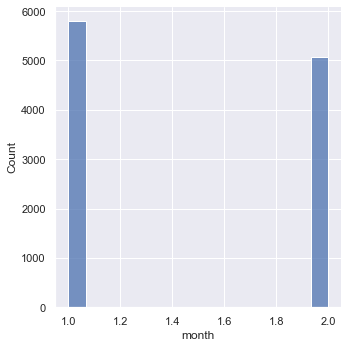

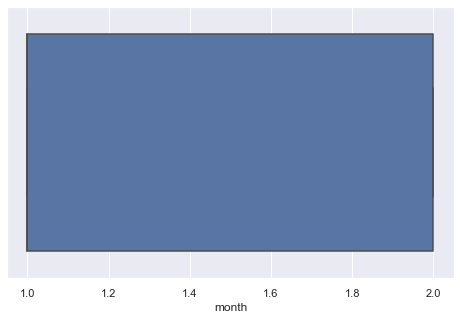

In [35]:
for column in numerical.columns:   
    iqr = np.percentile(numerical[column],75) - np.percentile(numerical[column],25)
    data2 = numerical[(numerical[column]>np.percentile(numerical[column],25) - 1*iqr) & (numerical[column]<np.percentile(numerical[column],75) + 1*iqr)].copy()
    print('Trimming simulation for the common quartile values of', column)
    sns.displot(data2[column])
    plt.show()
    sns.boxplot(x=numerical[column])
    plt.show()


Evaluating the histograms as requested

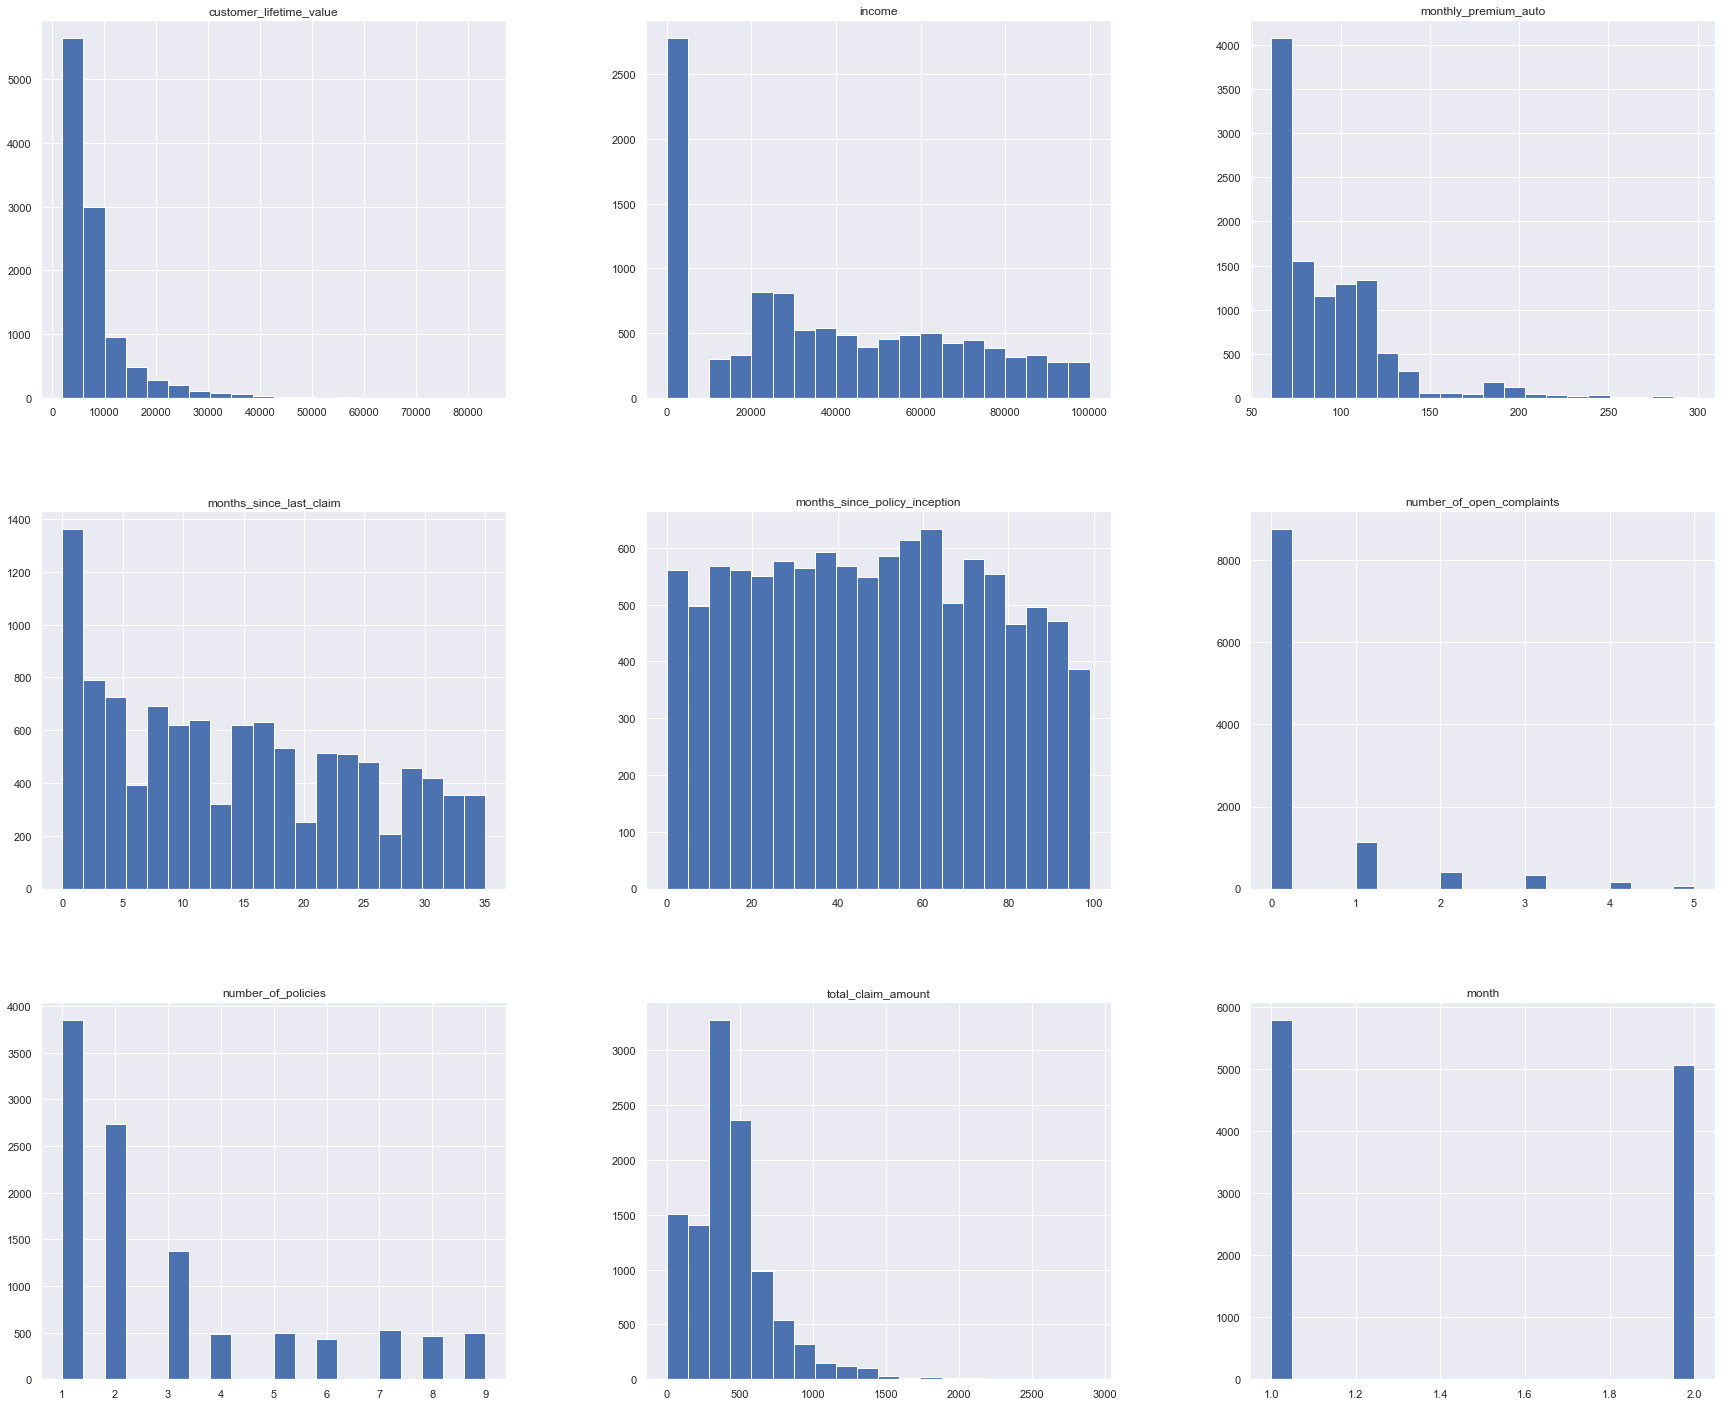

In [36]:
numerical.hist(bins=20, figsize=(30, 25))
plt.show()

I decided upon analysis to trim outliers of monthly premium auto because it has an aparent correlation with our target and the outlier aren't meaningfull, also not even include the month.

In [37]:
iqr = np.percentile(numerical['monthly_premium_auto'],75) - np.percentile(numerical['monthly_premium_auto'],25)
numerical = numerical[(numerical['monthly_premium_auto']>np.percentile(numerical['monthly_premium_auto'],25) - 1*iqr) & (numerical['monthly_premium_auto']<np.percentile(numerical['monthly_premium_auto'],75) + 1*iqr)].copy()

numerical.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,10259.0,7537.090241,6129.875339,1898.007675,3870.715367,5560.278162,8641.288305,51016.067040
income,10259.0,37619.081002,30453.891371,0.000000,0.000000,33760.000000,62446.000000,99981.000000
monthly_premium_auto,10259.0,86.864997,21.894668,61.000000,68.000000,80.000000,105.000000,149.000000
months_since_last_claim,10259.0,14.247490,10.372825,0.000000,5.000000,13.000000,23.000000,35.000000
months_since_policy_inception,10259.0,47.982552,27.937477,0.000000,24.000000,48.000000,71.000000,99.000000
number_of_open_complaints,10259.0,0.359977,0.890013,0.000000,0.000000,0.000000,0.000000,5.000000
number_of_policies,10259.0,2.984404,2.397184,1.000000,1.000000,2.000000,4.000000,9.000000
total_claim_amount,10259.0,398.872434,230.975966,0.099007,257.900458,365.312072,523.888845,1554.089517
month,10259.0,1.467297,0.498954,1.000000,1.000000,1.000000,2.000000,2.000000


Making a heat matrix to check correlations, and establishing that the only column that seems to have a correlation with total claim amount is fact monthly premium auto.

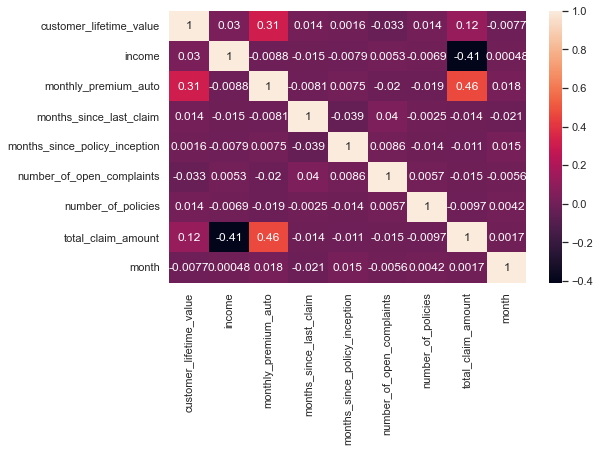

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month
customer_lifetime_value,1.000000,0.029933,0.314381,0.013613,0.001566,-0.033312,0.014051,0.123219,-0.007745
income,0.029933,1.000000,-0.008811,-0.014506,-0.007918,0.005285,-0.006897,-0.409548,0.000478
monthly_premium_auto,0.314381,-0.008811,1.000000,-0.008061,0.007542,-0.020338,-0.019314,0.464381,0.018411
months_since_last_claim,0.013613,-0.014506,-0.008061,1.000000,-0.038790,0.040316,-0.002511,-0.013570,-0.020954
months_since_policy_inception,0.001566,-0.007918,0.007542,-0.038790,1.000000,0.008607,-0.014017,-0.010857,0.015383
number_of_open_complaints,-0.033312,0.005285,-0.020338,0.040316,0.008607,1.000000,0.005739,-0.015084,-0.005648
number_of_policies,0.014051,-0.006897,-0.019314,-0.002511,-0.014017,0.005739,1.000000,-0.009736,0.004219
total_claim_amount,0.123219,-0.409548,0.464381,-0.013570,-0.010857,-0.015084,-0.009736,1.000000,0.001717
month,-0.007745,0.000478,0.018411,-0.020954,0.015383,-0.005648,0.004219,0.001717,1.000000


In [38]:
correlations_matrix = numerical.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()
correlations_matrix

X-y split

In [39]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

y = data['total_claim_amount']
X = data.drop(['total_claim_amount', 'month'], axis=1)

Normalizing the numerical dataset using MinMax Scaler Method

In [40]:
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler

X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = object)

display(X_num.head(3))
display(X_cat.head(3))

transformer = MinMaxScaler().fit(X_num)
X_normalized = transformer.transform(X_num)
X_normalized = pd.DataFrame(X_normalized, columns=X_num.columns)

X_normalized.describe().T

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,4809.216960,48029,61,7.0,52,0.0,9
1,2228.525238,0,64,3.0,26,0.0,1
2,14947.917300,22139,100,34.0,31,0.0,2


,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Arizona,No,Basic,College,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize
1,California,No,Basic,College,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize
2,Washington,No,Basic,Bachelor,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize


,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,10873.0,0.075145,0.084552,0.0,0.025992,0.047537,0.087179,1.0
income,10873.0,0.375442,0.303678,0.0,0.000000,0.338174,0.622738,1.0
monthly_premium_auto,10873.0,0.135935,0.145379,0.0,0.029536,0.092827,0.202532,1.0
months_since_last_claim,10873.0,0.407923,0.297134,0.0,0.142857,0.371429,0.657143,1.0
months_since_policy_inception,10873.0,0.485846,0.282121,0.0,0.242424,0.484848,0.717172,1.0
number_of_open_complaints,10873.0,0.072308,0.177835,0.0,0.000000,0.000000,0.000000,1.0
number_of_policies,10873.0,0.247183,0.299719,0.0,0.000000,0.125000,0.375000,1.0


In [41]:
#!git add .

In [42]:
#!git status

In [43]:
#!git commit -m "Lab day 4 R4 and R5 + Testing grounds Final tweaks"

In [44]:
#!git push